Please run the cell below to import libraries needed for this HW. Please use the autograd numpy, otherwise you will have issues. Please remember to always use the np library for mathematical functions (e.g., np.log, np.exp, np.sum, etc)

In [190]:
import autograd.numpy as np
from autograd import grad 
import matplotlib.pyplot as plt
%matplotlib inline

Q1) [5 points] Implement the sigmod funcation discussed in class. The function takes a value, x, as input and returns the sigmoid function applied to the value.

In [239]:
def sigmoid(x):
    #Your code here
    y = 1/(1 + np.exp(-x))
    return y

Q2) [20 points] Implement the logistic regression model and the cross entropy cost discussed in class. Note that the logistic regression model relies on the sigmoid function (which you have implemented above) and the linear  model (which you have implemented in HW2). You can use the linear model from HW2 for this problem. Similar to the least-squares cost from HW2, the cross entropy cost takes in as input an array of weights, w, an array of x's and an array of ys and return a float indicating the total cost.

In [240]:
#Your linear model from HW2
def model(x,w):
    #Your code here
    y = w[0] + np.dot(x.T, w[1:])
    return y

#The logistic regression cross entropy cost
def cross_entropy(w,x,y):
    #Your code here
    cost = -1 * np.sum(y * np.log(sigmoid(model(x, w))) + (1 - y) * np.log(1 - sigmoid(model(x, w))))
    return cost * (1/float(y.size))

Q3) [2 points] Run the code below to read a data file. Plot a scatter plot of x vs y.

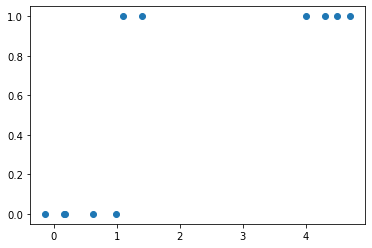

In [241]:
csvname = '2d_classification_data_v1_entropy.csv'
data = np.loadtxt(csvname,delimiter = ',')
x = data[:-1,:]
y = data[-1:,:] 
plt.scatter(x, y)
plt.show()

Q4) [10 points] Move the gradient descent function from HW2. Run the function using the cross_entropy cost and the x and y from above. The parameters should be set to: max_its=2000,w=[3.0,3.0 ], and alpha=1. Save the cost and weight history returned by the gradient descent function. Plot the cost history.


In [242]:
##gradient descent from HW2
def gradient_descent(g,alpha,max_its,w,x,y):
    gradient = grad(g)     
    ##Your code here
    w = np.array(w)
    x = np.array(x)
    y = np.array(y)
    weight_history = [w]
    cost_history = [g(w, x, y)]
    
    for i in range(max_its): # loop through iterations
        cost_history.append(g(w, x, y))  # update cost history
        w = w - alpha*gradient(w, x, y)  
        weight_history.append(w)
    return weight_history,cost_history

C:\Users\alina\AppData\Local\Temp/ipykernel_3576/3193090738.py:10: RuntimeWarning: invalid value encountered in multiply
  cost = -1 * np.sum(y * np.log(sigmoid(model(x, w))) + (1 - y) * np.log(1 - sigmoid(model(x, w))))


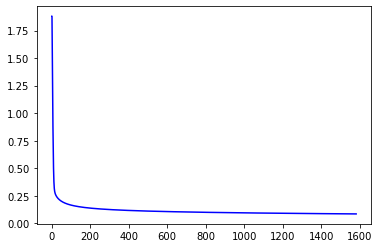

In [244]:
##Call the gradient_descent function here
##Plot the cost history here

#Your code here
w = [3.0, 3.0]

c_history = gradient_descent(cross_entropy, 1, 2000, w, x, y)[1]
w_history = gradient_descent(cross_entropy, 1, 2000, w, x, y)[0]

plt.plot(range(2001), c_history, color='blue')

Q5) [10 points] Implement a logistic regression classifier that takes in the learned weights and x as input and returns the probability of the positive class (note that this is just the output of the sigmoid applied to the linear combination of the x and w)

In [210]:
def logistic_regression(learned_w,x):
    #your code here
    y = learned_w[0] + np.dot(x.T, learned_w[1:])
    positive_class_prob = sigmoid(y)
    return positive_class_prob


Q6) [5 points] Use the learned weights from the last gradient descent run and the logistic regression function implemented above to plot the learned curve. You can use the linspace method (shown below) to generate a list of xs that you can use. You need to generate a y for each of the candidate xs using the logistic regression function and the learned weights. On the same figure, also plot the scatter plot from Q3. 


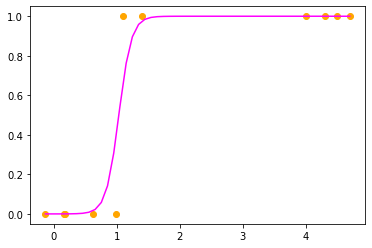

In [211]:
s = np.linspace(np.min(x),np.max(x))
#Your code here
c_history = np.array(c_history)
min_cost = 0

for i in range(len(c_history)):
    if c_history[i] < c_history[min_cost]:
        min_cost = i
        
min_weight = w_history[min_cost]

l = 1/(1 + np.exp(-min_weight[0] - s * min_weight[1]))

plt.plot(s, l, color='magenta')
plt.scatter(x, y, color='orange')



Q7) [5 points] Slightly modify the logistic regression model above so that it returns a 1 or 0 based on the specified threshold.

In [232]:
def logistic_regression_modified(learned_w, x, threshold):
    #your code here
    class_label = []
    for index in range(logistic_regression(learned_w, x).size):
        if logistic_regression(learned_w, x)[index] >= threshold:
            class_label.append(1)
        else:
            class_label.append(0)
    return class_label

Q8) [15 points] Write a function (called evaluate) that takes in actual and predicted ys (for a binary classification problem) and return a confusion matrix and the accuracy. Use the modified logistic regression model and the evaluate function below to report the confusion matrix and accuracy for the x and y used for our training at a threshold of 0.5.  

In [236]:
def evaluate(y_actual,y_pred):
    ## Your code here
    false_positive = 0
    false_negative = 0
    true_positive = 0
    true_negative = 0
    for index in range(len(y_pred)):
        if  y_actual[0][index]== y_pred[index]:
            if y_pred[index] == 1:
                true_positive +=1
            else:
                true_negative +=1
        else:
            if y_pred[index] == 1:
                false_positive +=1
            else:
                false_negative +=1
    accuracy = (true_positive + true_negative) / (true_positive + true_negative + false_positive + false_negative)
        
    return false_positive, false_negative, true_positive, true_negative, accuracy

# debugging

pred = logistic_regression_modified(min_weight, x, 0.5)
evaluate(y, pred)


(0, 0, 6, 5, 1.0)

Q9) [20 points] Implement the perceptron cost function from the class (the softmax version). Note that the perceptron cost also uses the linear model (the model function from question 2).

In [237]:
def perceptron_cost(w,x,y):    
   #Your code here
    cost = (1/float(y.size)) * np.sum(np.log(1 + np.exp(-y * model(x, w))))
    return cost

Q10) [10 points] Run gradient descent function using the perceptron cost and the x and y from above and the parameters set to: max_its=2000,w=[1.0,1.0], and alpha=1.0. Save the cost and weight history returned by the gradient descent function. Plot the cost history. Which cost seems to do better on this dataset? Why do think that is?


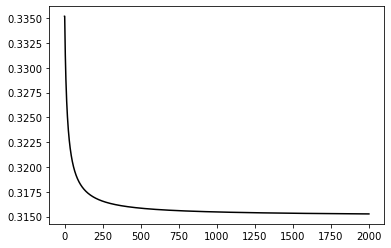

In [238]:
##Call the gradient_descent function here
w = [1.0, 1.0]

c_history = gradient_descent(perceptron_cost, 1, 2000, w, x, y)[1]
w_history = gradient_descent(perceptron_cost, 1, 2000, w, x, y)[0]


##Plot the cost history here
plt.plot(range(2001), c_history, color='black')

## The cross entropy cost does better on this data. This likely is because we used the softmax approximation in the perceptron cost

## The rest of these problems are for bonus points

Q11) [2 points]  The file 'heart.csv' has 304 lines, each one corresponding to a data point. Each row (i.e., data point), has several columns. Read the data file. Note that the first line is the header describing each column.

In [114]:
##Your code here
csvname = 'heart.csv'
data = np.loadtxt(csvname,delimiter=',', skiprows=1)

Q12) [2 points] Use the data above to set y to be the "target" and X to be the remaining columns.

In [118]:
##Your code here
x = data[:,1:14] # columns 1-13
y = data[:,13] # column 14

Q13) [2 points] Run the code below to import the logistic regression and the train_test split functions from sklearn. Split your data into 80% train 20% test.

In [124]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
##Your code here
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, train_size=0.8)

[[  1.   0. 135. ...   0.   3.   1.]
 [  1.   0. 140. ...   0.   3.   0.]
 [  0.   1. 132. ...   1.   2.   1.]
 ...
 [  0.   2. 108. ...   0.   2.   1.]
 [  0.   1. 135. ...   0.   2.   1.]
 [  1.   2. 120. ...   0.   3.   1.]]
[1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0.
 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0.
 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0.
 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0.
 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1.
 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0.
 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1.
 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1.
 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1.
 1. 1.]


Q14) [5 points] Use sklearn to fit a logistic regression model on your training set. Use all the default parameter. Do not evaluate at this point. (You can find out about sklearn logistic regression here: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [149]:
##Your code here
log_reg = LogisticRegression(max_iter = 10000000)
log_reg.fit(x_train, y_train)

LogisticRegression(max_iter=10000000)

Q15) [5 points] Use the .predict_proba function of the logistic regression model that you have learned on your X_test. Note that the .predict_proba function returns an array of tuples where each element corresponds to the predicted probability for class 0 and 1 of the data point.

In [150]:
##Your code here
tuples = log_reg.predict_proba(x_test)

Q16) [2 points] Filter the predicted probabilties from the last question to an array containing only the probabilites for class 1. I.e., you should no longer have tuples.

In [151]:
##Your code here
f = tuples[:,1]

Q17) [8 points] Use the roc_curve function from sklearn (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html) to plot the ROC curve for your predictions using the predicted probabilities for class 1 and your y_test (use the default parameters). Also, print out the thresholds generated by the roc_curve function.

In [250]:
##Your code here
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
fp, tp, thresholds = metrics.roc_curve( y_test, f)
print(thresholds)

[1.99562886e+00 9.95628856e-01 6.67782857e-01 1.06544940e-03]


Q18) [2 points] Use the roc_auc_score function from sklearn (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score) to report the AUC score using the exact same setup as the last question.

In [153]:
##Your code here
from sklearn.metrics import roc_auc_score

print(roc_auc_score(y_test, f))

1.0
